# Image Rendering

This notebook we will be demonstrating with example how an image is represented in computer. How to load, and perform basic image operation.

Our all experiment are only focused on RGB based raster (PNG) images.

## Library Loading

In [98]:
import cv2 as cv
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

## Example Image Loading

We have used example `astronaut` image available as a part of the skimage library.

In [33]:
img_astronaut = data.astronaut()

## Data Description

The image is stored as a numpy array, of dimension (`height` x `width` x `color channels`). The astronaut image is a square `512` x `512` size image, with RGB color channels. 

In [32]:
display(type(img_astronaut))
display('size: {} x {} x {}'.format(*img_astronaut.shape))

numpy.ndarray

'size: 512 x 512 x 3'

## Viewing image

`matplotlib.imshow` enables viewing of the image.  

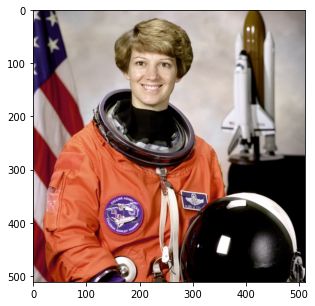

In [79]:
plt.figure(figsize=(5, 5))
plt.imshow(img_astronaut)
plt.show()

## Viewing each channel

The three channels are flattened to generate on matrix representation of the image. 

Each pixel have a value between (0 - 255). Black is represented as (0, 0, 0) and white is represented as (255, 255, 255). 

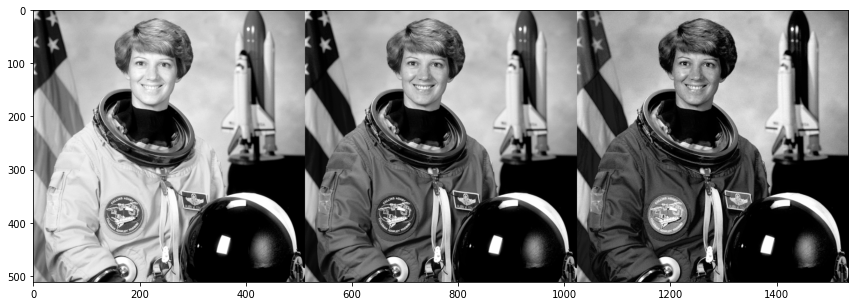

In [34]:
img_astronaut_flat = np.concatenate([img_astronaut[...,0], img_astronaut[..., 1], img_astronaut[..., 2]], axis=1)
plt.figure(figsize=(15,5))
plt.imshow(img_astronaut_flat, cmap='gray')
plt.show()

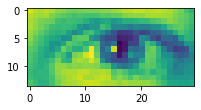

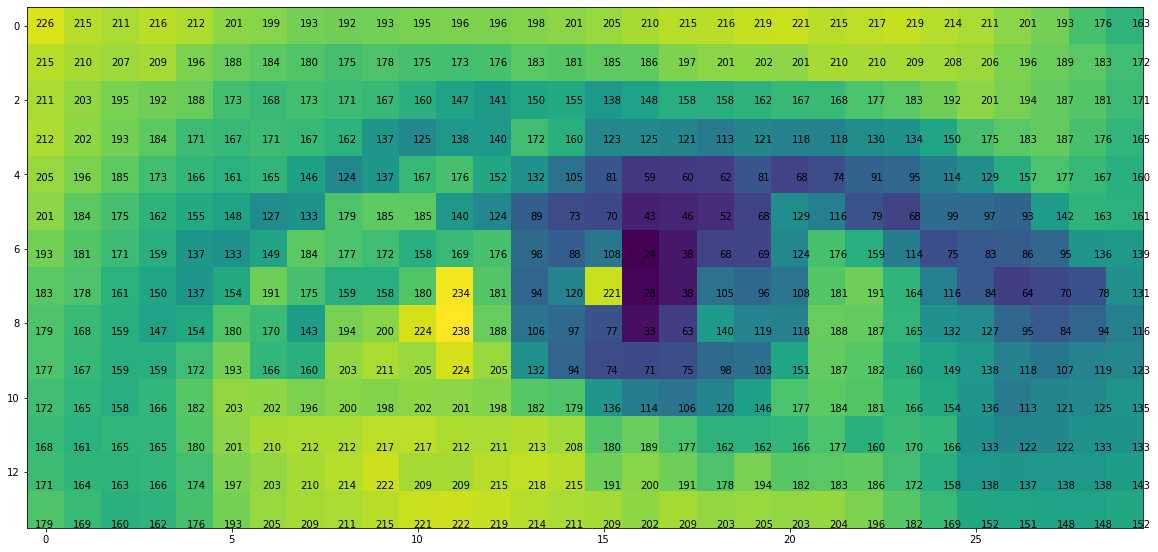

In [177]:
small_cut = img_astronaut[96:110,230:260, 0] # slicing Red Channel
plt.figure(figsize=(3,3))
plt.imshow(small_cut)
plt.show()

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
im = ax.imshow(small_cut)

x_start, x_end, y_start, y_end = -0.5, 14.0, -0.5, 30.0

jump_x = (x_end - x_start) / (2.0 * (small_cut.shape[0] + 2))
jump_y = (y_end - y_start) / (2.0 * (small_cut.shape[1] + 2))
x_positions = np.linspace(start=x_start, stop=x_end, num=small_cut.shape[0], endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=small_cut.shape[1], endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = small_cut[x_index, y_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_y, text_x, label, color='black', ha='center', va='center')
plt.show()


## RGB Distribution

We split the image by color channel, and creates a pixel value map. Higher the value of the pixel image is dominant by that color. The astronaut image has more `red` content.

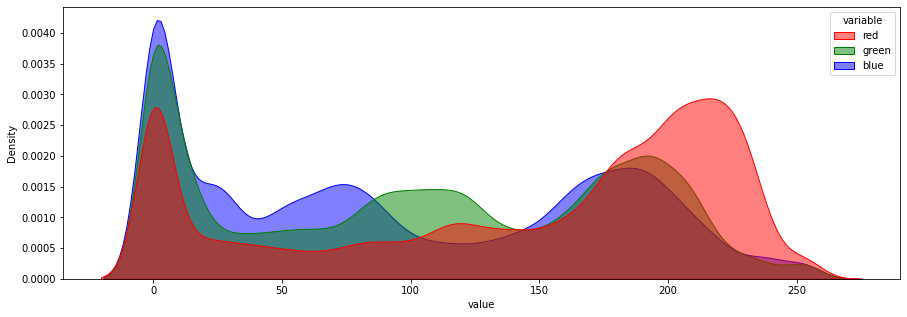

In [49]:
color_df = pd.DataFrame({'red': img_astronaut[...,0].reshape(-1), 
                         'green': img_astronaut[..., 1].reshape(-1),
                         'blue': img_astronaut[..., 2].reshape(-1)})

plt.figure(figsize=(15,5))
sns.kdeplot(x='value', 
            hue='variable', 
            fill=True, 
            data=color_df.melt(), 
            alpha=0.5,
            palette={
                      'red': 'red', 
                      'green': 'green', 
                      'blue': 'blue'})
plt.show()

## Removing Red Channel

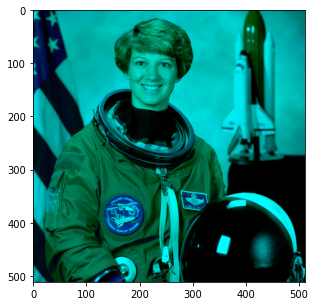

In [55]:
img_astronaut_red_removed = img_astronaut.copy()
img_astronaut_red_removed[..., 0] = 0
plt.figure(figsize=(5, 5))
plt.imshow(img_astronaut_red_removed)
plt.show()

## Slicing Image

Slicing image with matrix operation

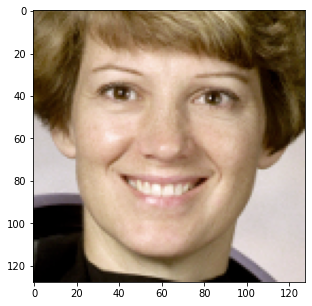

In [29]:
img_astronaut_part = img_astronaut[62:190,162:290]
plt.figure(figsize=(5,5))
plt.imshow(img_astronaut_part)
plt.show()

## Histogram Equalization

Histogram equalization ensures the pixel value distribution on each channel is uniform, this results in maximizing the global contrast in the image.

<img src="HistogramEqualizationImg.png" width=400 height=400>

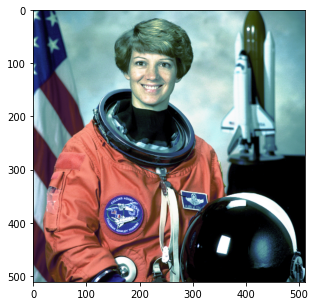

In [66]:
img_astronaut_equalize = np.array([cv.equalizeHist(img_astronaut[...,i]) 
                                   for i in range(img_astronaut.shape[-1])]).transpose((1,2,0))

plt.figure(figsize=(5, 5))
plt.imshow(img_astronaut_equalize)
plt.show()

Histogram equalization results in image using pixel values sampled uniformly over the image.

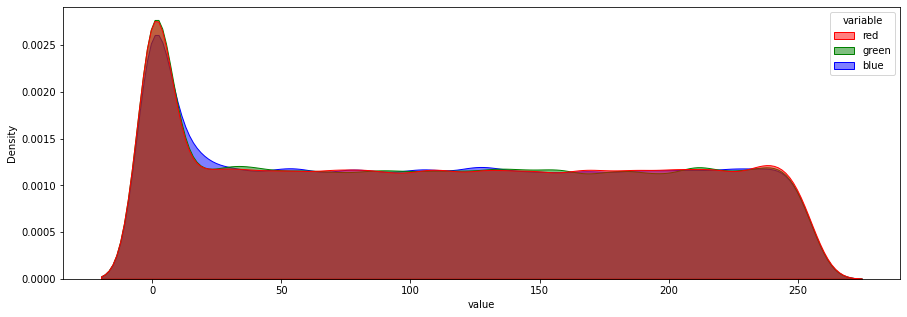

In [67]:
color_df = pd.DataFrame({'red': img_astronaut_equalize[...,0].reshape(-1), 
                         'green': img_astronaut_equalize[..., 1].reshape(-1),
                         'blue': img_astronaut_equalize[..., 2].reshape(-1)})

plt.figure(figsize=(15,5))
sns.kdeplot(x='value', 
            hue='variable', 
            fill=True, 
            data=color_df.melt(), 
            alpha=0.5,
            palette={
                      'red': 'red', 
                      'green': 'green', 
                      'blue': 'blue'})
plt.show()

# Changing Color Space

Converting RGB color space to monochrom gray. `skimage` exposes `rgb2gray` function API, that converts RGB scale to gray scale. The mapping is linear.

$$Y = 0.2125 R + 0.7154 G + 0.0721 B$$

The gray scale units are values ranging from (0, 1).

'The data type of gray image: float64'

'Image Dimension: 512 x 512 '

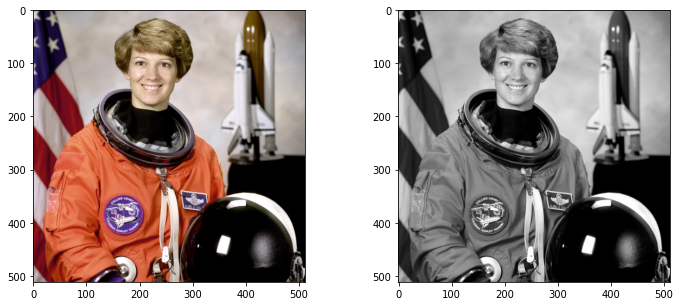

In [97]:
img_astronaut_gray = rgb2gray(img_astronaut)

display('The data type of gray image: {}'.format(img_astronaut_gray.dtype))
display('Image Dimension: {} x {} '.format(*img_astronaut_gray.shape))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(img_astronaut)
axs[1].imshow(img_astronaut_gray, cmap=plt.cm.gray)
plt.show()

## Algebraic Manipulation of Images

Algebraic operations on numpy allows image manupulations. One fun example is demonstrated below where we created a siamese twin of the astronaut by splitting the images in half and reflecting the first half concatenating back to itself. 

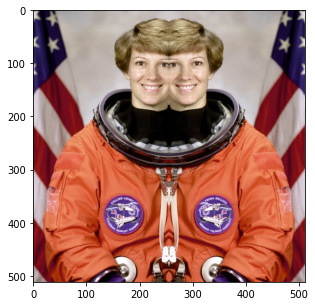

In [84]:
half_img = img_astronaut[:, :(img_astronaut.shape[1]//2), :]
rev_half = half_img[:, ::-1, :]
plt.figure(figsize=(5,5))
plt.imshow(np.concatenate([half_img, rev_half], axis=1))
plt.show()

# Filters

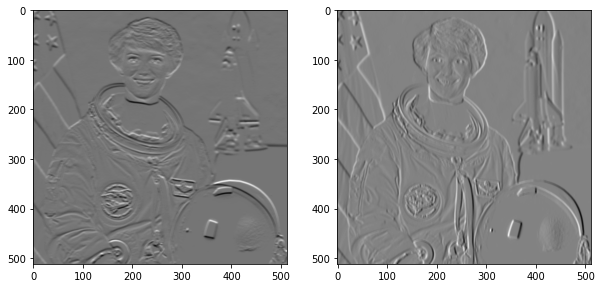

In [110]:
vertical_border = np.array([[1, 1, 0, -1, -1], 
                            [1, 1, 0, -1, -1], 
                            [1, 1, 0, -1, -1],
                            [1, 1, 0, -1, -1],
                            [1, 1, 0, -1, -1]])

horizontal_border = np.array([[ 1,  1,  1,  1,  1],
                              [ 1,  1,  1,  1,  1],
                              [ 0,  0,  0,  0,  0], 
                              [-1, -1, -1, -1, -1],
                              [-1, -1, -1, -1, -1]])

img_astronaut_horiz = sc.ndimage.convolve(img_astronaut_gray, horizontal_border)
img_astronaut_vert  = sc.ndimage.convolve(img_astronaut_gray, vertical_border)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img_astronaut_horiz, cmap=plt.cm.gray)
axs[1].imshow(img_astronaut_vert, cmap=plt.cm.gray)
plt.show()

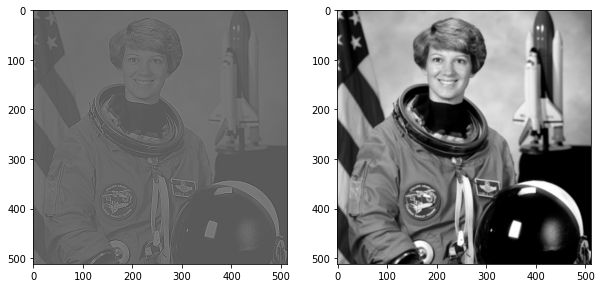

In [120]:
sharpen_filter = np.array([[ 0, -2,  0], 
                           [-2,  9, -2],
                           [ 0, -2,  0]])

blur_filter = np.array([[1,  2,  1],
                        [2,  4,  2],
                        [1,  2,  1]]) * (1./16)

img_astronaut_sharpen = sc.ndimage.convolve(img_astronaut_gray, sharpen_filter)
img_astronaut_blur  = sc.ndimage.convolve(img_astronaut_gray, blur_filter)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(img_astronaut_sharpen, cmap=plt.cm.gray)
axs[1].imshow(img_astronaut_blur, cmap=plt.cm.gray)
plt.show()

## Random Convolution

`get_random_wt` generates random weight matrix for matrix convolution. The `scale` parameter controls the value contrast. The generation process ensures sum of the convolution weight matrix is `1`.

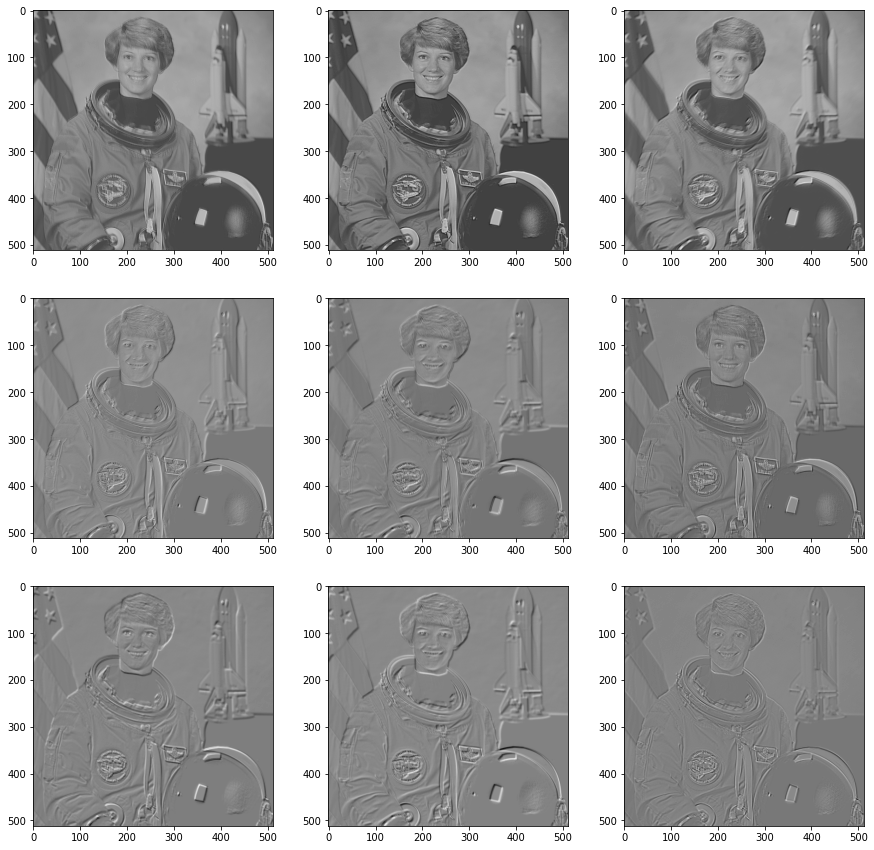

In [157]:
def get_random_wt(scale=1):
    rand_wt =  scale * np.random.random((5,5)) - 2 * scale
    rand_wt = rand_wt - (np.sum(rand_wt)/np.product(rand_wt.shape)) 
    rand_wt[2, 2] += 1. - np.sum(rand_wt)  
    return rand_wt

fig, axs = plt.subplots(3, 3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        img_astronaut_random = sc.ndimage.convolve(img_astronaut_gray, get_random_wt(scale=(i+1)**2))
        axs[i, j].imshow(img_astronaut_random, cmap=plt.cm.gray)
    
plt.show()